# CASTEP Al Slab benchmark performance

This notebook compares the performance of the small Al Slab (al3x3) benchmark across different HPC facilities.

We compute the mean time per SCF cycle from all cycles in the output file apart from the fastest and slowest cycle times. Performance is plotted as SCF cycles per second.

## Setup section

Import the required modules and define useful functions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,6)
import seaborn as sns
sns.set(font_scale=1.5, context="paper", style="white", font="serif")
pal = sns.color_palette()
cols = pal.as_hex()

In [2]:
import sys
sys.path.append('../../../python-modules')

In [3]:
from utilities import filemanip, sysinfo
from appanalysis import castep

In [4]:
sysdetails = sysinfo.getdetails('../../../systems.yaml')

plotcores = True
unitlabel = "Nodes"
if plotcores:
    unitlabel = "Cores"

../../../python-modules/utilities/sysinfo.py:6: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  systems = yaml.load(input)


## Process data

In [5]:
systems = ['ARCHER','Athena','Cirrus','Thomas','Tesseract','CSD3-Skylake','Isambard','EPCC-CascadeLake']
systems = ['ARCHER', 'ARCHER2']
perf = {}
notes = {}
names = {}
nodes = {}
perf_max = {}
cpn = {}

for system in systems:
    wdir = '../al3x3/results/' + system
    filelist = filemanip.get_filelist(wdir, 'al3x3_')
    sysdict = sysdetails[system]
    names[system] = sysdict['Name']
    cpn[system] = sysdict['PCores']*sysdict['PPerNode']
    print('\n============================================================')
    print(sysdict['Name'])
    castep_df = pd.DataFrame(castep.create_df_list(filelist, sysdict['PCores']*sysdict['PPerNode']))
    nodes[system], perf_max[system] = ca.get_perf_stats(castep_df, 'max', writestats=True)
    print('\n============================================================')


ARCHER
                             Perf                               Count
                              min    median       max      mean   sum
Nodes Processes Threads                                              
1     24        1        0.005409  0.005429  0.005519  0.005453     5
2     48        1        0.011341  0.011341  0.011341  0.011341     1
4     96        1        0.019480  0.019480  0.019480  0.019480     1
8     192       1        0.030145  0.030145  0.030145  0.030145     1
16    384       1        0.034719  0.034719  0.034719  0.034719     1
                 Perf                               Count
                  min    median       max      mean   sum
Cores Nodes                                              
24    1      0.005409  0.005429  0.005519  0.005453     5
48    2      0.011341  0.011341  0.011341  0.011341     1
96    4      0.019480  0.019480  0.019480  0.019480     1
192   8      0.030145  0.030145  0.030145  0.030145     1
384   16     0.034719  0.0

## Performance Comparison

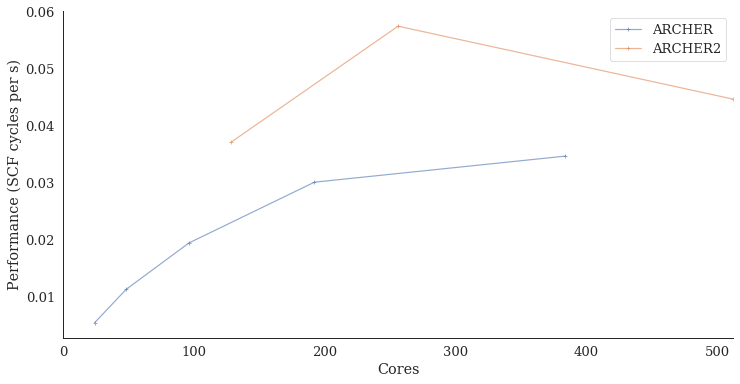

In [9]:
for system in systems:
    plt.plot(nodes[system], perf_max[system], '-+', label=names[system], alpha=0.6)
plt.xlim((0,512))
plt.xlabel(unitlabel)
plt.ylabel('Performance (SCF cycles per s)')
plt.legend(loc='best')
sns.despine()

## Single node performance comparisons

In [7]:
n_baseperf = perf_max['ARCHER'][0]
c_baseperf = perf_max['ARCHER'][0]/cpn['ARCHER']

print("Performance improvement relative to ARCHER:\n")
print("{:>30s} {:>20s} {:>15s}".format('System', 'Perf (SCF cycles/s)', 'Improvement'))
print("{:>30s} {:>20s} {:>15s}".format('======', '===================', '==========='))
print("Single node")
for system in systems:
    print("{:>30s} {:>20.5f} {:>15.3f}".format(system, perf_max[system][0], perf_max[system][0]/n_baseperf))
    
print("\n")

print("per-core")
for system in systems:
    cperf = perf_max[system][0]/cpn[system]
    print("{:>30s} {:>20.5f} {:>15.3f}".format(system, cperf, cperf/c_baseperf))

Performance improvement relative to ARCHER:

                        System  Perf (SCF cycles/s)     Improvement
                        ======  ===================     ===========
Single node
                        ARCHER              0.00552           1.000
                       ARCHER2              0.03711           6.724


per-core
                        ARCHER              0.00023           1.000
                       ARCHER2              0.00029           1.261
